### Amos day 1

In [41]:
%matplotlib inline
import iris
iris.FUTURE.netcdf_promote = True
import iris.plot as iplt
import matplotlib.pyplot as plt
import numpy
from provenance import get_history_record

In [42]:
data_directory = '/Users/michael/desktop/data-carpentry/data/'
file_name = 'pr_Amon_ACCESS1-3_historical_r1i1p1_200101-200512.nc'
data_location = data_directory + file_name

In [78]:
cube = iris.load_cube(data_location, 'precipitation_flux')

/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):


In [49]:
#type(cube)
#iris.cube.Cube
type(cube)

iris.cube.Cube

In [15]:
#print(cube)
type(cube.data)

numpy.ndarray

In [79]:
cube.data = cube.data * 86400
cube.units = 'mm/day'
#print(cube)

In [45]:
clim = cube.collapsed('time', iris.analysis.MEAN)
#print(clim)

/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):


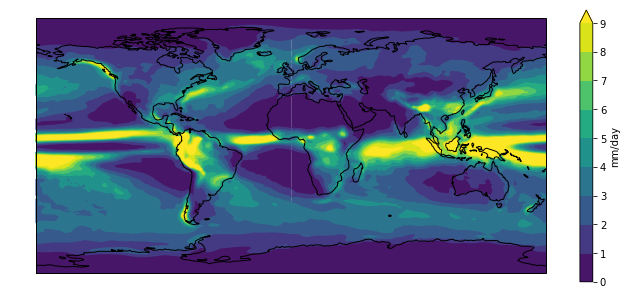

In [48]:
fig = plt.figure(figsize=[12,5])
iplt.contourf(clim , levels=numpy.arange(0,10), extend='max')
plt.gca().coastlines()
cbar = plt.colorbar()
cbar.set_label(str(cube.units))
plt.show()

# Month selection

In [55]:
import iris.coord_categorisation

In [70]:
#iris.coord_categorisation
cube = iris.load_cube(access_pr_file, 'precipitation_flux')

/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):


In [80]:
iris.coord_categorisation.add_month(cube,'time')

In [81]:
cube_june = cube.extract(iris.Constraint(month='Jun'))

In [88]:
cube_june.shape

(5, 145, 192)

In [82]:
clim_june = cube_june.collapsed('time', iris.analysis.MEAN)

/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


In [90]:
clim_june.shape

(145, 192)

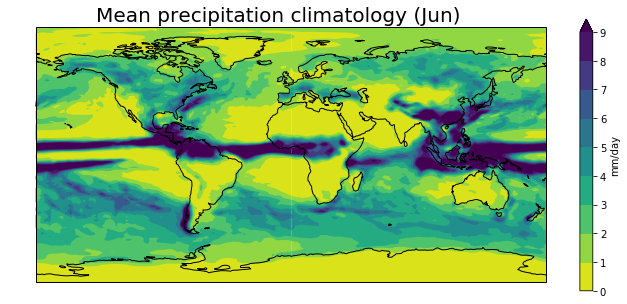

In [92]:
fig = plt.figure(figsize=[12,5])
iplt.contourf(clim_june, cmap='viridis_r', levels=numpy.arange(0, 10), extend='max')
plt.gca().coastlines()
cbar = plt.colorbar()
cbar.set_label(str(cube.units))
plt.title("Mean precipitation climatology (Jun)",fontsize=20)

plt.show()

In [112]:
def plot_month(subset_month):
    
    #read data
    cube = iris.load_cube(data_location, 'precipitation_flux')
    
    #adjust units
    cube.data = cube.data * 86400
    cube.units = 'mm/day'
    
    #subset month
    iris.coord_categorisation.add_month(cube,'time')
    month_data = cube.extract(iris.Constraint(month=subset_month))
    
    #summarise
    month_mean = month_data.collapsed('time', iris.analysis.MEAN)
    
    #plot
    fig = plt.figure(figsize=[12,5])
    iplt.contourf(month_mean, cmap='viridis_r', levels=numpy.arange(0, 10), extend='max')
    plt.gca().coastlines()
    cbar = plt.colorbar()
    cbar.set_label(str(cube.units))
    plt.title("Mean precipitation climatology - " + subset_month ,fontsize=20)

    plt.show()

/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/Users/Michael/anacond

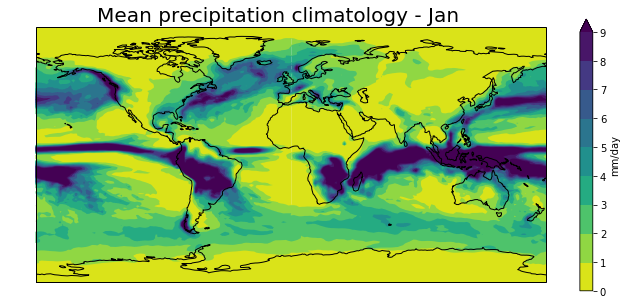

/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


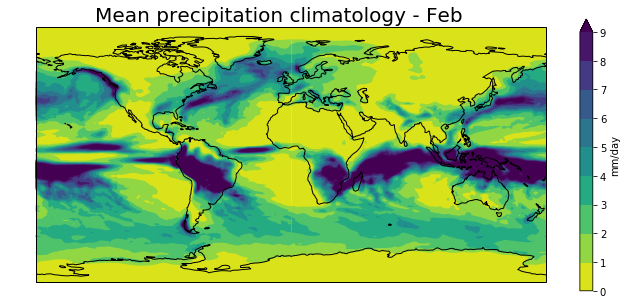

/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


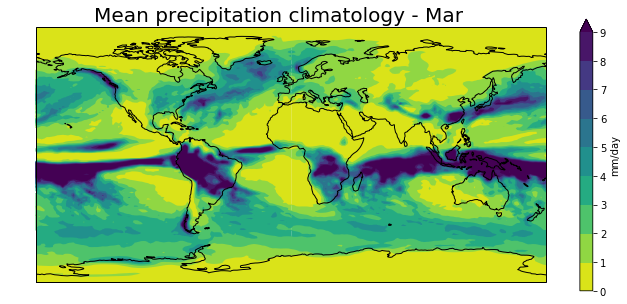

/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


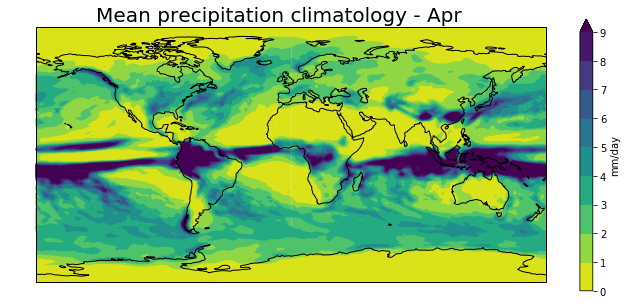

/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


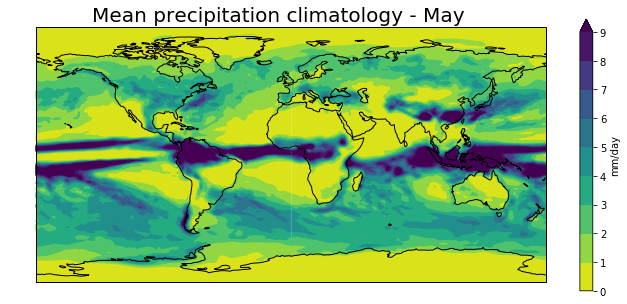

/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


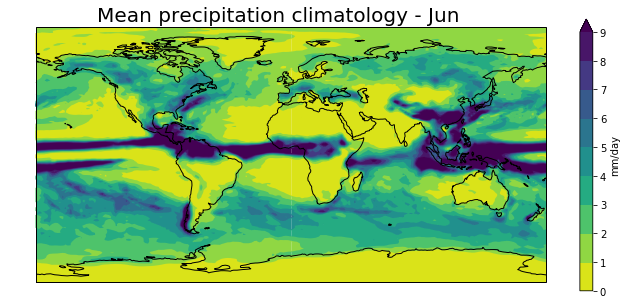

/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


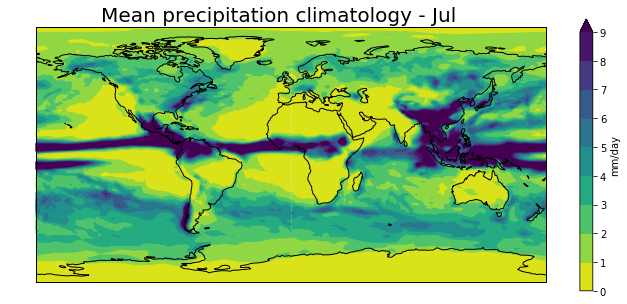

/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


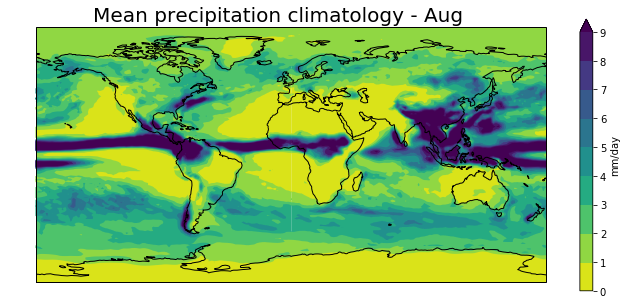

/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


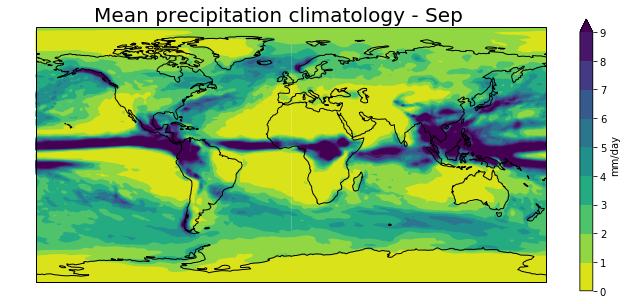

/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


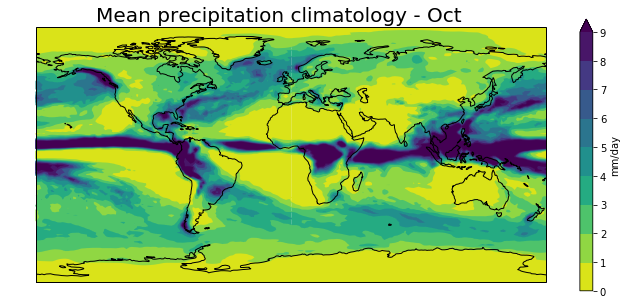

/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


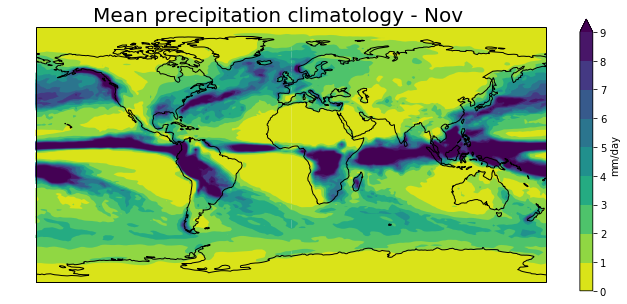

/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


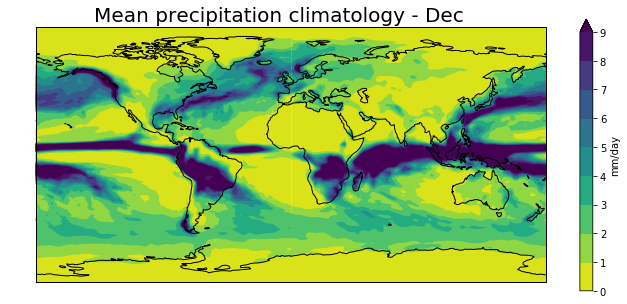

In [113]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for i in months:
    plot_month(i)

In [ ]:
def read_data(in_data):
    return(iris.load_cube(in_data, 'precipitation_flux'))

def scale_data(input_data,scale_factor):
    return(input_data*scale_factor)

def subset_data(input_data,subset_month)
    iris.coord_categorisation.add_month(input_data,'time')
    return(cube.extract(iris.Constraint(month=subset_month)))

def calculate_mean(input_data)
    return(input_data.collapsed('time', iris.analysis.MEAN))

def plot_data(input_data):
    
    
def plot_month(in_data,subset_month):
    
    #read data
    cube = read_data(in_data)
    
    #adjust units
    cube.data = cube.data * 86400
    cube.units = 'mm/day'
    
    #subset month
    iris.coord_categorisation.add_month(cube,'time')
    month_data = cube.extract(iris.Constraint(month=subset_month))
    
    #summarise
    month_mean = month_data.collapsed('time', iris.analysis.MEAN)
    
    #plot
    fig = plt.figure(figsize=[12,5])
    iplt.contourf(month_mean, cmap='viridis_r', levels=numpy.arange(0, 10), extend='max')
    plt.gca().coastlines()
    cbar = plt.colorbar()
    cbar.set_label(str(cube.units))
    plt.title("Mean precipitation climatology - " + subset_month ,fontsize=20)

    plt.show()

In [153]:
mask_file = 'sftlf_fx_ACCESS1-3_historical_r0i0p0.nc'
mask_location = data_directory + mask_file

def mask_to_array(input_file):

    sltlf_cube = iris.load_cube(mask_location, 'land_area_fraction')
    numpy.zeros((sltlf_cube.shape[0],sltlf_cube.shape[1]))
    ocean_mask = numpy.where(sltlf_cube.data<50,True,False)
    land_mask = ~ocean_mask
    
    return land_mask,ocean_mask

lm, om = mask_to_array(mask_location)

/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'sftlf'
  warnings.warn(message % (variable_name, nc_var_name))
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):


In [169]:
from provenance import get_history_record

In [174]:
get_history_record().write("output_file/history_log.txt")

AttributeError: 'str' object has no attribute 'write'

In [175]:
output_location = '/Users/michael/desktop/data-carpentry/output/'

text_file = open(output_location + "history_log.txt", "w")
output = get_history_record()
text_file.write(get_history_record())

281

In [176]:
get_history_record()

'Sun Feb 04 16:24:56 2018: /Users/Michael/anaconda/envs/pyaos-lesson/bin/python /Users/Michael/anaconda/envs/pyaos-lesson/lib/python3.6/site-packages/ipykernel_launcher.py -f /Users/Michael/Library/Jupyter/runtime/kernel-6bc36e3b-4f34-467a-bfd4-c3282c04ae5f.json (Git hash: 268a349)'